<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/CLUSTER/clustering-K-H-DS(ai-page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

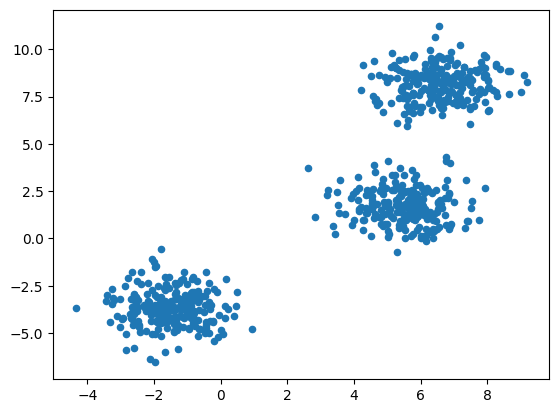

In [ ]:
###
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 700, n_features=2, centers=3, cluster_std=0.9, shuffle=True, random_state=231)
plt.scatter(X[:,0], X[:,1], s=20, marker='o')


In [ ]:
X

array([[-1.97610415, -5.04975941],
       [-2.31385207, -3.60861331],
       [ 3.43896943,  0.21986699],
       ...,
       [-2.51762257, -3.6585397 ],
       [-3.32718103, -4.40985551],
       [-2.83982749, -5.06405393]])

# Description about
n_clusters = 3, the number of centroids
n_init the number of times that run the algorithm
remember with different random centroids with the objective of
minimize SSE.
# max iter---the number of maximun iterations
in each only ejecution..




## A problem in K-means is one centroid could be let empty...
this is soluted with C-fuzzy means..

this is stopped if reach the convergence before of reach the number
of maximun iterations..


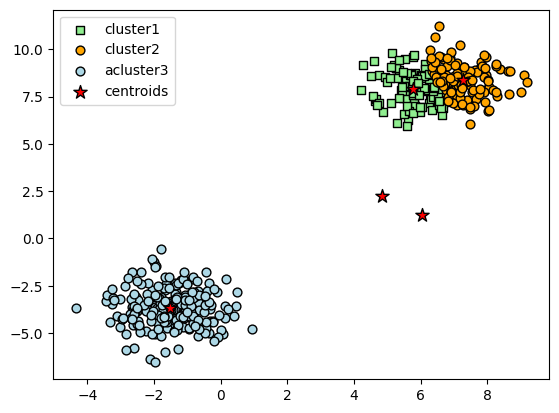

In [ ]:
km = KMeans(n_clusters = 5,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

In [ ]:
# K-means ++
#How initialize the centroids...
## initialize with init='k-means++'

In [ ]:
# Elbow method...
# We can uses SSE to measure
# we can get SSE with km.inertia_

In [ ]:
km.inertia_

906.7599028905161

In [ ]:
## How we can choose k.
# if K increase the distortion reduced
# due centroids are nearest of points..
# the insight behind elbow method  is that choose the value of K where distortion increase more fast

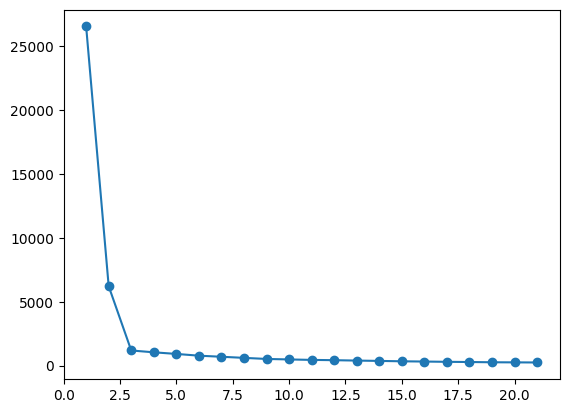

In [ ]:
distortions = []
for i in range(1,22):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,22), distortions, marker='o')

In [ ]:
## Calidad del agrupamiento....
# una representación gŕafica de como están agrupadas las muestras en los grupos...
# Cohesión del grupo a(i)  la distancia media entre una muestra y el restante de muestras en el mismo grupo
# separación del grupo b(i) a partir del grupo  mas cercano como la distancia entre una muestra
# y todas las muestras del grupo mas cercano.


In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
y_km = km.fit_predict(X)

0.6232142618598082


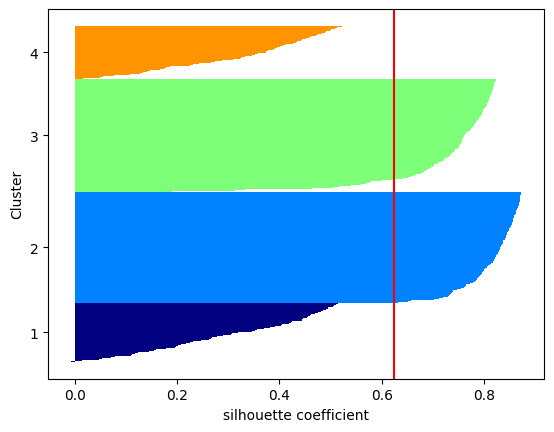

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_lower + len(c_silhouette_vals)), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2.0)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
print(silhouette_avg)


In [ ]:
# Hierarchical clustering
# Advantage no is neccesary define k apriori ....

#Example using complete linkage...
##### remeber algorithm --->
# Calculate the distance matrix..
# combine the two groups more closest in more inequality distances
# update matrix
# repeat until there are one cluster

In [ ]:
import pandas as pd
import numpy as np
vars = ['income', 'consumption', 'visits']
labels = ['one', 'two', 'three', 'four', 'five']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=vars)

In [ ]:
df

,income,consumption,visits
0,2.273775,1.797593,5.281139
1,1.601187,1.652732,1.211037
2,4.024125,4.208017,1.864880
3,2.614903,3.387202,1.259237
4,4.331832,0.129343,0.532842


In [ ]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)

In [ ]:
row_dist

,one,two,three,four,five
one,0.000000,4.127844,4.532626,4.338078,5.437369
two,4.127844,0.000000,3.581567,2.009559,3.199544
three,4.532626,3.581567,0.000000,1.739669,4.301696
four,4.338078,2.009559,1.739669,0.000000,3.753550
five,5.437369,3.199544,4.301696,3.753550,0.000000


In [ ]:
from  scipy.cluster.hierarchy import linkage

In [ ]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [ ]:
pd.DataFrame(row_clusters, columns=['label1', 'label2', 'distance', 'number of items']
             , index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])


,label1,label2,distance,number of items
cluster 1,2.0,3.0,1.739669,2.0
cluster 2,1.0,4.0,3.199544,2.0
cluster 3,5.0,6.0,4.301696,4.0
cluster 4,0.0,7.0,5.437369,5.0


Text(0, 0.5, 'l2 norma')

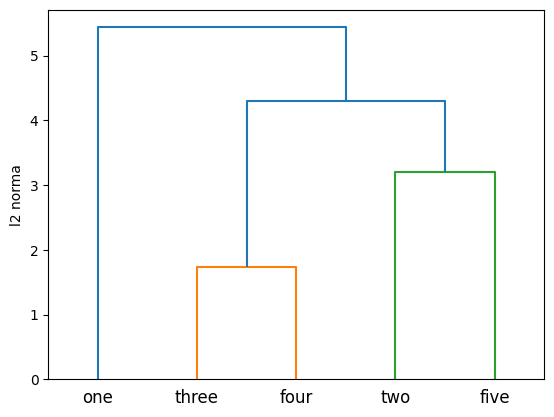

In [ ]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels =labels)
plt.ylabel('l2 norma')

*italicized text*

[(0.2191981798709012, 0.16205825179156666), (0.006849201347641261, 0.2255736477795159), (0.08906835869220413, 0.029112050081787022)]
[(0.2293699986608243, 0.1700621991420331), (0.024204841841669003, 0.21578627019041433), (0.09784928592101975, 0.03126979335582023)]
[(0.23792655766767995, 0.1731478079212988), (0.028196171016746666, 0.20318016176168346), (0.10763546146994568, 0.03261653436218111)]
[(0.2383095181650288, 0.17689082795651168), (0.03380689130227456, 0.19819753445106394), (0.11523198745278736, 0.027295114587817495)]
[(0.2384433031784985, 0.18071989751862028), (0.0326622012193008, 0.19522086007583744), (0.1211094739849079, 0.027146861704300113)]
[(0.2387676281003536, 0.1860922130511607), (0.024292101642983913, 0.1859350157371989), (0.13135086912556188, 0.02985465823646135)]
[(0.24219719154451058, 0.1916130868912058), (0.02258475634125498, 0.18252792317017694), (0.13739982270072526, 0.034024271044495166)]
[(0.24514609988549554, 0.19362662602654387), (0.021573498872992945, 0.1790

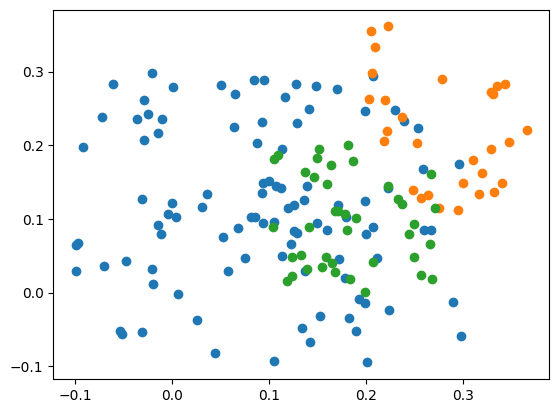

In [ ]:
## From scratch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
def centroid(x,y,k, size):
  low_x = x-k
  high_x = x+k
  low_y = y-k
  high_y = y+k
  x = uniform(low_x,high_x, size)
  y = uniform(low_y,high_y,size)
  r=x**2+y**2 < k
  x=x[r]
  y=y[r]
  return x,y
xa,ya = centroid(0.1,0.1,0.2,100)
xb,yb = centroid(0.4,0.3,0.2,100)
xc,yc = centroid(0.2,0.1,0.1,40)
plt.scatter(xa,ya)
plt.scatter(xb,yb)
plt.scatter(xc,yc)
dataX = np.concatenate((xa, xb, xc))
dataY = np.concatenate((ya, yb, yc))
data = [(dataX[i],dataY[i]) for i in range(len(dataX))]
## Cluster implementation:
def distance(x1,y1,x2,y2):
  return ((x2-x1)**2 + (y2-y1)**2)**1/2
# init centroids
def centroids_init(k,data, random=False):
  init_points = []
  if random==False:
    for x in range(k):
      init_points.append((data[x][0],data[x][1]))
  elif random==True:
    interandom = np.random.randint(0,len(data), size=k)
    init_points = [data[k] for k in interandom]
  return init_points
def cluster(k,data, centroids):
  clusters = {k:[] for k in range(0,k)}
  for point in data:
    aux = []
    for k in centroids:
      aux.append(distance(k[0],k[1],point[0],point[1]))
    index  = aux.index(min(aux))
    clusters[index].append(point)
  return clusters
def update_centroids(clusters):
  k = []
  for cluster in clusters:
    x,y = [],[]
    for e in clusters[cluster]:
      x.append(e[0])
      y.append(e[1])
    k.append((sum(x)/len(x),sum(y)/len(y)))
  return k
k = 3
centroids = centroids_init(k,data, random=True)
clusterK = cluster(k,data,centroids)
iter = 0
while centroids != update_centroids(clusterK):
  centroids = update_centroids(clusterK)
  clusterK = cluster(k,data,centroids)
  iter +=1
  print(centroids)
print(iter)

## DBSCAN


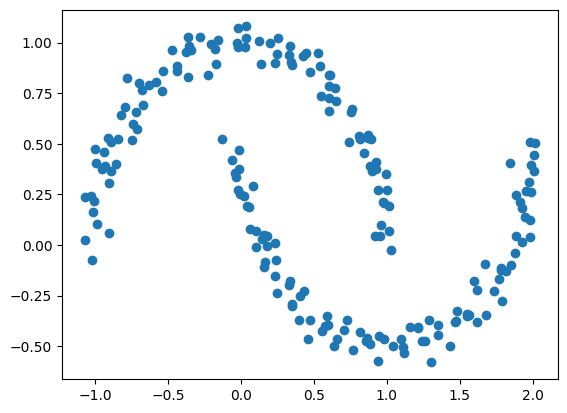

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
X,y = make_moons(n_samples =200,noise = 0.05, random_state = 0)
plt.scatter(X[:,0],X[:,1])

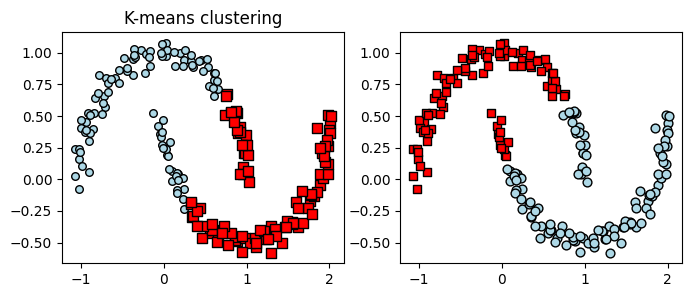

In [ ]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
yhat = km.fit_predict(X)
ax1.scatter(X[yhat==0,0], X[yhat==0,1], c='lightblue', edgecolor='black', marker='o', s=30, label='cluster1')
ax1.scatter(X[yhat==1,0], X[yhat==1,1], c='red', edgecolor='black', marker='s', s=50, label='cluster2')
ax1.set_title("K-means clustering")
Hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
yhatA = Hierarchical.fit_predict(X)
ax2.scatter(X[yhatA==0,0], X[yhatA==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster1')
ax2.scatter(X[yhatA==1,0], X[yhatA==1,1], c='red', edgecolor='black', marker='s', s=40, label='cluster2')

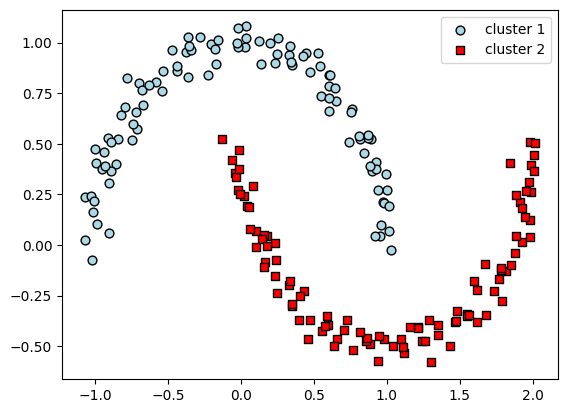

In [ ]:
# DBSCAN algorithm
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], c='red', edgecolor='black', marker='s', s=40,  label='cluster 2')
plt.legend()